In [239]:
import tensorflow as tf
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [148]:
dir= 'data/ex7data2.mat'#from Andrew Ng homework
mat = scipy.io.loadmat(dir)
X_ = mat["X"]
print(X_.shape)

(300, 2)


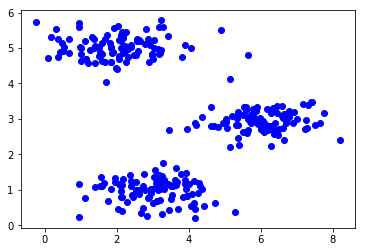

In [186]:
plt.plot(X_[:,0],X_[:,1],"bo")

In [209]:
k = 3
num_step = 20
m = X_.shape[0]
n = X_.shape[1]

In [227]:
X = tf.placeholder(tf.float64,shape=[m,n])
idx = tf.Variable(tf.zeros([m],dtype=tf.int64))
random_id = np.random.choice(range(m),3)
centrio = tf.Variable(X_[random_id])

In [228]:
re_data = tf.reshape(tf.tile(X,[1,k]),[m,k,n])
re_cen = tf.reshape(tf.tile(centrio,[m,1]),[m,k,n])
dist = tf.reduce_sum(tf.square(re_data-re_cen),axis=2)
new_idx = tf.argmin(dist,axis=1)

In [229]:
add = tf.unsorted_segment_sum(X,new_idx,3)
total = tf.unsorted_segment_sum(tf.ones_like(X),new_idx,3)
mean = add/total

In [230]:
with tf.control_dependencies([mean]):
    train_op = tf.group(tf.assign(idx,new_idx),tf.assign(centrio,mean))

In [231]:
with tf.Session() as sess:
    his_cen = []
    sess.run(tf.global_variables_initializer())
    for i in range(num_step):
        _,cen = sess.run([train_op,centrio],feed_dict={X:X_})
        his_cen.append(cen)
    ids= sess.run(idx)

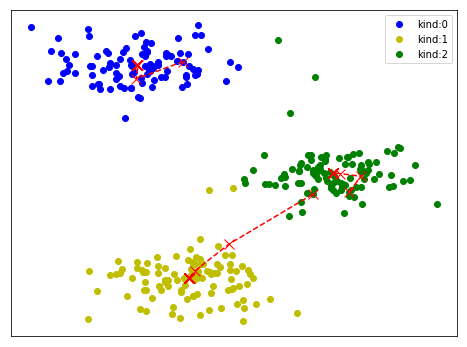

In [238]:
def plotData(X_,ids,his_cen):
    plt.figure(figsize=(8,6))
    color = ["b","y","g"]
    for i in range(len(np.unique(ids))):
        z = np.array([X_[j] for j in range(X_.shape[0]) if ids[j] == i ])
        plt.plot(z[:,0],z[:,1],"o",c=color[i],label = "kind:"+str(i))
    for i in range(his_cen[0].shape[0]):
        tmp_x = []
        tmp_y = []
        for j in range(len(his_cen)):
            tmp_x.append(his_cen[j][i,0])
            tmp_y.append(his_cen[j][i,1])
        plt.plot(tmp_x,tmp_y,"rx--",markersize=10)
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    
plotData(X_,ids,his_cen)